# Predicting Player Purchasing
## *What game play factors are important to predicting purchasers and volume?* 

*Pranav Shah*

*August 28th, 2017*

## Introduction


## Executive Summary



## Get, Clean, and Prepare Data

### Import data

In [16]:
# get data from working directory
file <- "playersample.txt"
players <- read.table(file, header = TRUE, stringsAsFactors = FALSE)

In [17]:
# understand data structure
str(players)
head(players)
summary(players)

'data.frame':	244889 obs. of  19 variables:
 $ ID           : chr  "050aba960764716a812d7a88e9cf8e91acb44064" "0000cfa2f22149a6c336f05672124676216fa5f6" "0014bdadf38606b9966720f7908ad3aec180ef25" "003d0da66a9e6b5f4d679dbb3cf41ce607171357" ...
 $ INSTALLDATE  : chr  "2017-03-24" "2017-02-21" "2017-02-22" "2017-05-07" ...
 $ PUBLISHER    : chr  "organic" "organic" "organic" "organic" ...
 $ COUNTRY      : chr  "US" "RU" "RU" "EG" ...
 $ PLATFORM     : chr  "iPhone" "iPhone" "iPhone" "Google" ...
 $ PURCHASES_3  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BOOKINGS_3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SESHTIME     : int  14848 224 343 95 26565 23785 8935 195 4146 7988 ...
 $ SESSIONS     : int  25 1 2 3 25 46 8 2 7 11 ...
 $ TOTALSINKS   : int  95 1 5 0 152 0 66 23 78 40 ...
 $ LASTCOURSE   : int  16 1 1 0 23 0 11 3 12 14 ...
 $ LASTINVENTORY: int  30335 10000 10000 0 34250 0 11000 10000 33100 11000 ...
 $ COMPLETES    : int  5 0 0 0 39 0 12 0 14 14 ...
 $ ABANDONS     : int  0 0 0 0 2 0 0 0 9 1 ..

ID,INSTALLDATE,PUBLISHER,COUNTRY,PLATFORM,PURCHASES_3,BOOKINGS_3,SESHTIME,SESSIONS,TOTALSINKS,LASTCOURSE,LASTINVENTORY,COMPLETES,ABANDONS,RETRYS,ATTEMPTS,DAILYATTEMPTS,PURCHASES_30,BOOKINGS_30
050aba960764716a812d7a88e9cf8e91acb44064,2017-03-24,organic,US,iPhone,0,0,14848,25,95,16,30335,5,0,19,25,0,NA,NA
0000cfa2f22149a6c336f05672124676216fa5f6,2017-02-21,organic,RU,iPhone,0,0,224,1,1,1,10000,0,0,0,0,0,NA,NA
0014bdadf38606b9966720f7908ad3aec180ef25,2017-02-22,organic,RU,iPhone,0,0,343,2,5,1,10000,0,0,0,0,0,NA,NA
003d0da66a9e6b5f4d679dbb3cf41ce607171357,2017-05-07,organic,EG,Google,0,0,95,3,0,0,0,0,0,0,0,0,NA,NA
003d3b318676300092063ab334871f1bec8c1afb,2017-03-25,Vungle,AU,iPhone,0,0,26565,25,152,23,34250,39,2,4,44,1,NA,NA
004b690a8b32c8b66d7d334c79ebb4d6e6911f7a,2017-02-26,AdColony,US,Google,0,0,23785,46,0,0,0,0,0,0,0,0,1,1.99


      ID            INSTALLDATE         PUBLISHER           COUNTRY         
 Length:244889      Length:244889      Length:244889      Length:244889     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   PLATFORM          PURCHASES_3         BOOKINGS_3          SESHTIME     
 Length:244889      Min.   : 0.00000   Min.   :  0.0000   Min.   :     0  
 Class :character   1st Qu.: 0.00000   1st Qu.:  0.0000   1st Qu.:   280  
 Mode  :character   Median : 0.00000   Median :  0.0000   Median :  1554  
                    Mean   : 0.01888   Mean   :  0.0948   Mean   :  6009  
         

#### Variable descriptions

Each row represents a player's metrics in first three days of game-play and that player's purchase volume and spend after thirty days, which will be the basis of our labeled data when modeling.

Variable| Description
-------|--------------
ID | Player id value
INSTALLDATE   | Date player installed
PUBLISHER     | Origin of install, organic = appstore, other = paid
COUNTRY       | Country of player
PLATFORM      | Device platform
PURCHASES_3  | Number of purchases in the first three days of game play
BOOKINGS_3 | Amount of spend in the first three days of game play
SESHTIME    | Total session time in seconds in the first three days
SESSIONS  | Total unique sessions in first three days
TOTALSINKS | Number of power ups used in the first three days
LASTCOURSE  | The max course a player unlocked in the first three days
LASTINVENTORY| The last soft currency inventory a player had after the first three days
COMPLETES    | Total number of succesful completions of game levels in first three days
ABANDONS    | Total number of quits in the first three days
RETRYS       | Total re-attempts after immediately failing a level in first three days
ATTEMPTS    | Total starts of any levels in the first three days
DAILYATTEMPTS | Total daily level plays in the first three days 
PURCHASES_30  | Total number of in-app purchases made in the first thirty days
BOOKINGS_30   | Total amount spent in the first thirty days

#### Pre-liminary observations

There are a few things to take note of in the initial look in the summary of data. First, PURCHASES_30 and BOOKINGS_30 have an overwhelming number of NAs. This is something we will need to clean. Next, when looking at the LASTCOURSE column, at least 25% of the observations have a zero value (note 1st quartile = 0). There is no course 0 in the game, and only a few conditions exist where this could exist. When a player registers zero for LASTCOURSE it is for a couple reasons: 1) data is incomplete or not sent from the device or 2) the player is playing offline. We will address this and discuss further in a subsequent section. Leaving this unaddressed could pose problems to any modelling. 

In the next sub-section we'll continue to clean the data and add addtional columns for which will be included in our analysis.

### Clean data and add calculated variables

As we prepare the dataset for exploration and modelling, we need to clean up a few rows with NAs, drop columns that have no impact on our analysis, and add several calculated columns related to purchasing. 

#### Summary of cleaning steps:

1. First we will drop the ID 
2. Change datapoints with NAs to 0, based on the summary above this should affect PURCHASES_30, BOOKINGS_30, and SESHTIME
3. Change INSTALLDATE to date type
4. Factor character columns

In [18]:
# Drop the ID column, as it is simply a character identifier.
require(dplyr)

players <- players %>% select(-ID)

In [19]:
#change numeric columns with any NAs to 0 
players[is.na(players)] <- 0

In [20]:
#change character column to date
players[, "INSTALLDATE"] <- as.Date(players[, "INSTALLDATE"])

In [21]:
#factor charater columns
players <- data.frame(lapply(players, function(x) if(is.character(x)) as.factor(x) else x))

#### Adding mutations

Next we want to create binary values, if players are purchases or not for both after three days or thirty days. Also, we want to add the number of failures a player experienced in their first three days of game play and their success rate. Note, in the structure, all calculated columns can be identified by a lowercase naming convention.

In [29]:
#create a purchaser column, fails, success.rate column
players <- players %>% mutate(purchaser_30 = PURCHASES_30 > 0)
players <- players %>% mutate(purchaser_3 = PURCHASES_3 > 0)
players <- players %>% mutate(fails = (ABANDONS + RETRYS))
players <- players %>% mutate(success.rate = ifelse(ATTEMPTS > 0, COMPLETES/(ATTEMPTS + RETRYS), 0))

### Remove incomplete observations

As previously noted, we also need to make a determination of how to handle data that is potentially incomplete or erroneous. When a player's LASTCOURSE reports as zero, the player's device is not sending gameplay data to the servers. 

Let's take a look at how this problematic data could affect our modelling by filtering for 30 day purchasers where the last course is zero after three days.

In [30]:
# filter for data where lastcourse = 0 and purchasers-30 = true.
players.err <- players %>% filter(LASTCOURSE == 0 & purchaser_30 == TRUE)

# Summarize potentially erroneous/incomplete data for select columns
summary(players.err %>% select(-INSTALLDATE, -PUBLISHER, -COUNTRY))

    PLATFORM    PURCHASES_3        BOOKINGS_3         SESHTIME     
 Amazon :  0   Min.   : 0.0000   Min.   :  0.000   Min.   :     0  
 Google :787   1st Qu.: 0.0000   1st Qu.:  0.000   1st Qu.:  3941  
 iOS (Un:  0   Median : 0.0000   Median :  0.000   Median : 11224  
 iPad   : 10   Mean   : 0.7853   Mean   :  3.878   Mean   : 16257  
 iPhone : 32   3rd Qu.: 1.0000   3rd Qu.:  1.990   3rd Qu.: 23104  
               Max.   :34.0000   Max.   :139.920   Max.   :126419  
    SESSIONS        TOTALSINKS   LASTCOURSE LASTINVENTORY   COMPLETES      
 Min.   :  1.00   Min.   :0    Min.   :0    Min.   :0     Min.   :0.00000  
 1st Qu.:  7.00   1st Qu.:0    1st Qu.:0    1st Qu.:0     1st Qu.:0.00000  
 Median : 15.00   Median :0    Median :0    Median :0     Median :0.00000  
 Mean   : 25.37   Mean   :0    Mean   :0    Mean   :0     Mean   :0.01327  
 3rd Qu.: 31.00   3rd Qu.:0    3rd Qu.:0    3rd Qu.:0     3rd Qu.:0.00000  
 Max.   :256.00   Max.   :0    Max.   :0    Max.   :0     Max.   :6.

Note how TOTALSINKS, LASTINVENTORY, COMPLETES, ABANDONS, RETRYS, ATTEMPTS, and DAILYATTEMPTS variables' quartile ranges are at zero, while other columns such as SESHTIME and BOOKINGS_3 are not. This is due to the gameplay data, which excludes purchasing and session data, doesn't report back to the servers for some reason.

Because the potential for modelling problems will arise from this subset of data, it is safer to throw this data away. 

In [31]:
# Remove incomplete data where last course is zero.
players.sub <- players %>% filter(LASTCOURSE >= 1)
str(players.sub)
summary(players.sub)

'data.frame':	156656 obs. of  22 variables:
 $ INSTALLDATE  : Date, format: "2017-03-24" "2017-02-21" ...
 $ PUBLISHER    : Factor w/ 54 levels "0","Ad4Game",..: 42 42 42 51 34 42 42 31 42 49 ...
 $ COUNTRY      : Factor w/ 226 levels "0","A1","AD",..: 212 176 176 15 212 212 212 212 102 212 ...
 $ PLATFORM     : Factor w/ 5 levels "Amazon","Google",..: 5 5 5 5 2 4 5 5 4 5 ...
 $ PURCHASES_3  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BOOKINGS_3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SESHTIME     : num  14848 224 343 26565 8935 ...
 $ SESSIONS     : int  25 1 2 25 8 2 7 11 3 24 ...
 $ TOTALSINKS   : int  95 1 5 152 66 23 78 40 6 51 ...
 $ LASTCOURSE   : int  16 1 1 23 11 3 12 14 2 10 ...
 $ LASTINVENTORY: int  30335 10000 10000 34250 11000 10000 33100 11000 11000 11000 ...
 $ COMPLETES    : int  5 0 0 39 12 0 14 14 1 14 ...
 $ ABANDONS     : int  0 0 0 2 0 0 9 1 1 0 ...
 $ RETRYS       : int  19 0 0 4 4 0 5 2 0 32 ...
 $ ATTEMPTS     : int  25 0 0 44 16 0 28 16 4 49 ...
 $ DAILYATTEMPTS: int  0 0 0

  INSTALLDATE                 PUBLISHER        COUNTRY         PLATFORM    
 Min.   :2017-01-01   organic      :44115   US     :62262   Amazon :    0  
 1st Qu.:2017-03-19   CrossInstall :22199   GB     :11693   Google :64779  
 Median :2017-04-19   SupersonicAds:14106   CA     : 8237   iOS (Un:    2  
 Mean   :2017-04-12   TapJoy       :13635   DE     : 7076   iPad   :22821  
 3rd Qu.:2017-05-14   Fyber        : 9549   FR     : 7056   iPhone :69054  
 Max.   :2017-06-15   Vungle       : 8902   IT     : 3949                  
                      (Other)      :44150   (Other):56383                  
  PURCHASES_3         BOOKINGS_3          SESHTIME         SESSIONS      
 Min.   : 0.00000   Min.   :  0.0000   Min.   :     0   Min.   :  1.000  
 1st Qu.: 0.00000   1st Qu.:  0.0000   1st Qu.:   802   1st Qu.:  2.000  
 Median : 0.00000   Median :  0.0000   Median :  2839   Median :  4.000  
 Mean   : 0.02535   Mean   :  0.1276   Mean   :  7518   Mean   :  8.341  
 3rd Qu.: 0.00000   3r

Removing the players who don't register a LASTCOURSE, removes roughly 88K players from our analysis (observations in "players" vs. "players.sub"). Addtionally, we now see a more realistic distribution for the variables we previously mentioned. 

In many mobile games, it isn't uncommon for 50% of players to quit the game within a few minutes of installing or not even opening the game, which is why some of the columns still exhibit a skewed distribution on level results (ABANDONS, ATTEMPTS, COMPLETES, fails, and RETRYS). These players don't get far enough into the game to register a level attempt. We will not remove this data, because 1) it could bias the data to only retained players and 2) it would add complexity to identify players who have truly churned or coming back but not in our examination time window.

### Remove non-gameplay columns

The final pruning of data comes from focusing our analysis on in-game behaviors. Demographic factors such as COUNTRY and PUBLISHER, while potentially important, are not in-game actions. Including these factors in our modelling could possibly wash out actual gameplay habits, which is the focus of this analysis. Additionally, there are a large number of factor levels for COUNTRY and PUBLISHER that would likely need consolidation to reduce the complexity in modelling.

In [34]:
# remove non-gameplay factor columns 
players.sub <- players.sub %>% select(-INSTALLDATE, -PUBLISHER, -COUNTRY, -PLATFORM)

## Explore player data

One of the assumptions that our analysis looks to understand more fully, is that players who make purchases in the game, behave differently. They are more engaged with the game they are playing. As this an assumption well tested and proven in other games, it will be the basis of our exploratory analysis. In this section of analysis we will often stratify by payers and non-payers to better understand any behaviorial diffences that can better predict purchasing. 

### Skewness of prepared data

As seen in the summary output for *players.sub* in the previous section, the mean is greater than the median for most variables, except fails. This implies that the unstratified dataset is postively skewed. The descriptive statistics below show additional measures including skewness. The skew in the data is incredibly high given that the measure is much greater than zero. In large part this skew exists because over 50% and 70% of players leave the game in 1day and 3 days, respectively. Examining these measures stratified by purchasers and non-purchasers would provide a better understanding of how this data is distributed among groups. We will do this visually in a subsequent section.

In [39]:
require(fBasics)

#Get basic stats including skew for all variable columns
basicStats(players.sub[, sapply(players.sub, is.numeric)])[c("nobs", 
                                                             "Median", 
                                                             "Mean", 
                                                             "Stdev",
                                                             "Skewness"),]

#unload these packages as they cause function call issues with dplyr
detach("package:fBasics", unload =TRUE)
detach("package:timeSeries", unload=TRUE)
detach("package:timeDate", unload=TRUE)

Loading required package: fBasics
Loading required package: timeDate
Loading required package: timeSeries


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org


,PURCHASES_3,BOOKINGS_3,SESHTIME,SESSIONS,TOTALSINKS,LASTCOURSE,LASTINVENTORY,COMPLETES,ABANDONS,RETRYS,ATTEMPTS,DAILYATTEMPTS,PURCHASES_30,BOOKINGS_30,fails,success.rate
nobs,1.566560e+05,1.566560e+05,1.566560e+05,1.566560e+05,1.566560e+05,1.566560e+05,156656.0000,1.566560e+05,1.566560e+05,1.566560e+05,1.566560e+05,1.566560e+05,1.566560e+05,1.566560e+05,156656.00000,1.56656e+05
Median,0.000000e+00,0.000000e+00,2.839000e+03,4.000000e+00,1.400000e+01,4.000000e+00,11000.0000,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,5.00000e-01
Mean,2.535500e-02,1.276130e-01,7.518079e+03,8.341398e+00,3.946589e+01,9.203184e+00,64615.8511,8.816611e+00,4.670940e-01,3.721607e+00,1.229157e+01,1.255394e+00,1.838610e-01,8.935360e-01,4.18870,4.73510e-01
Stdev,4.205870e-01,2.622632e+00,1.105403e+04,1.116749e+01,6.457000e+01,2.441289e+01,7852194.3569,1.592238e+01,3.484057e+00,1.639541e+01,2.479295e+01,5.300948e+00,3.107986e+00,1.781201e+01,17.42660,4.30030e-01
Skewness,4.689345e+01,5.303667e+01,2.813664e+00,3.809287e+00,3.857152e+00,1.960399e+01,188.7302,3.294839e+00,7.446761e+01,1.064101e+01,5.409204e+00,1.535827e+01,6.852324e+01,7.679637e+01,10.64372,6.75437e-01


### Purchasers vs non-purchasers

Another aspect of mobile free-to-play games is that a very small percentage of your install base will ever convert into payers. The bar charts below illustrate this reality.  

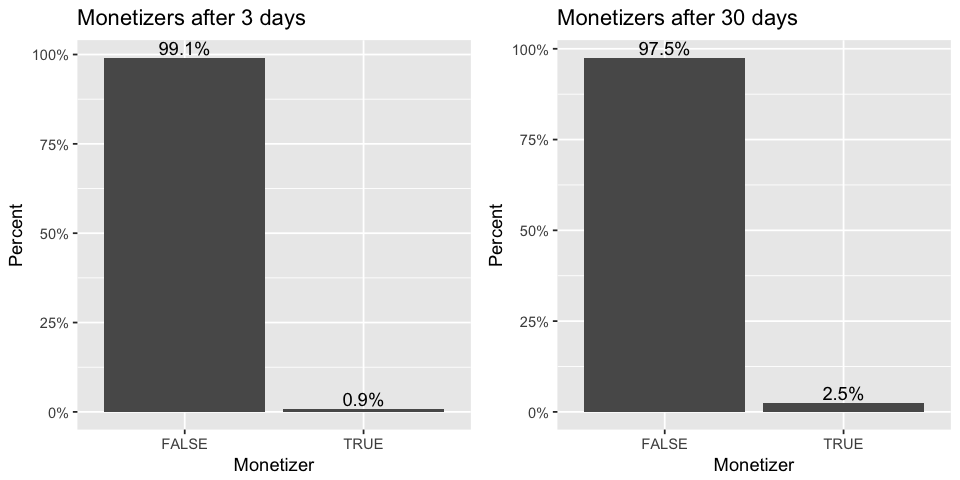

In [43]:
require(ggplot2)
require(gridExtra)

require(repr)
options(repr.plot.width=8, repr.plot.height=4)

# How many purchasers are there as a proportion of players monetize after 3 days and after 30 days 
p1 <- ggplot(players.sub, aes(x = as.factor(purchaser_3))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Monetizers after 3 days", y = "Percent", x = "Monetizer")

p2 <- ggplot(players.sub, aes(x = as.factor(purchaser_30))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Monetizers after 30 days", y = "Percent", x = "Monetizer")

grid.arrange(p1, p2, ncol = 2)

In the charts above, under 1.0% of installs purchase within the first three days and by day 30 only 2.5% purchase. This is a huge imbalance between non-monetizers and monetizers that could prove challenging when training a model to the to the labeled data - purchase volume and purchasers. 

### Distributions by purchaser

Here we'll look at how purchaser and non-purchaser distributions differ for 3 key metrics 1) session time, 2) total sinks, and 3) level attempts.

#### Session time by 30 day purchaser

The violin plot below shows that the distributions of total session times is highly skewed towards zero and more so in non-purchasers. This is not surprising given the aforementioned fact that many players don't make it past 2 minutes in the game. The means are different visually (red dot in plot below), but the means were not hypothesis tested since it is not the purpose of this analysis. Payers do tend to spend more time on average in the game than non-payers. Some non-spenders spend an ample amount of time in the game as shown by the max in the violin plot, but this is more an outlier than the norm.

purchaser_30,count,mean,median,sd
FALSE,150690,7344.335,2791,10813.92
TRUE,3893,18246.697,14147,15626.72


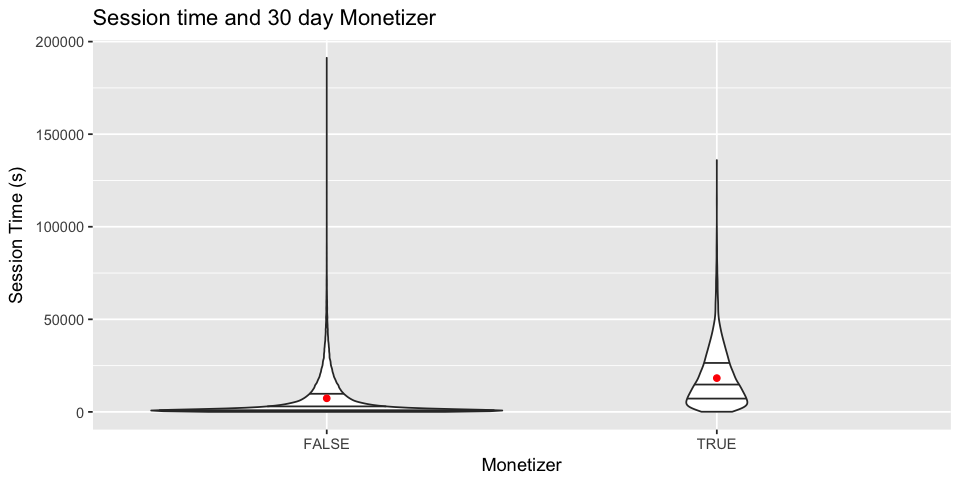

In [52]:
# How does the distribution of session time (3 days from install) differ between day 30 payers and non-payers?
ggplot(filter(players.sub, SESHTIME > 0), aes(x = factor(purchaser_30), y = SESHTIME)) + 
  geom_violin(trim = TRUE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  stat_summary(fun.y = "mean", geom = "point", colour = "red") +
  xlab('Monetizer')  + ylab('Session Time (s)') +
  ggtitle('Session time and 30 day Monetizer')

# table form for reference
players.sub %>% filter(SESHTIME >0) %>% group_by(purchaser_30) %>% 
    summarise(count = n(), mean = mean(SESHTIME), median = median(SESHTIME), sd = sd(SESHTIME))

Even when increasing the minimum session time to 2 minutes, there isn't really a significant change in the distributions for either group.

purchaser_30,count,mean,median,sd
FALSE,148193,7466.737,2907,10863.11
TRUE,3891,18256.024,14157,15625.32


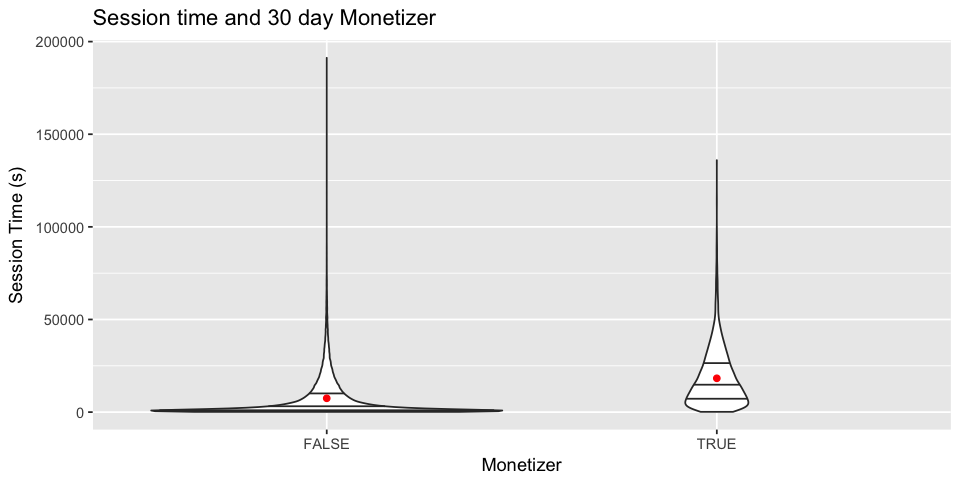

In [53]:
# How does the distribution of session time (3 days from install) differ between day 30 payers and non-payers?
# Is there any change when session times are greater than 2 minutes
ggplot(filter(players.sub, SESHTIME > 120), aes(x = factor(purchaser_30), y = SESHTIME)) + 
  geom_violin(trim = TRUE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  stat_summary(fun.y = "mean", geom = "point", colour = "red") +
  xlab('Monetizer')  + ylab('Session Time (s)') +
  ggtitle('Session time and 30 day Monetizer')

# table form for reference
players.sub %>% filter(SESHTIME > 120) %>% group_by(purchaser_30) %>% 
    summarise(count = n(), mean = mean(SESHTIME), median = median(SESHTIME), sd = sd(SESHTIME))

#### Total Sinks by 30 day purchaser

As was the case with session time, payers seem to use more power ups on average than non-payers. Again we've included many players who have likely installed the game and haven't played very much in the non-payers. The more power ups a player sinks the sooner that player will run out and therefore purchase in-app bundles to get new power-ups. 

purchaser_30,count,mean,median,sd
FALSE,150690,37.84366,14,61.50059
TRUE,3893,119.81017,87,119.03925


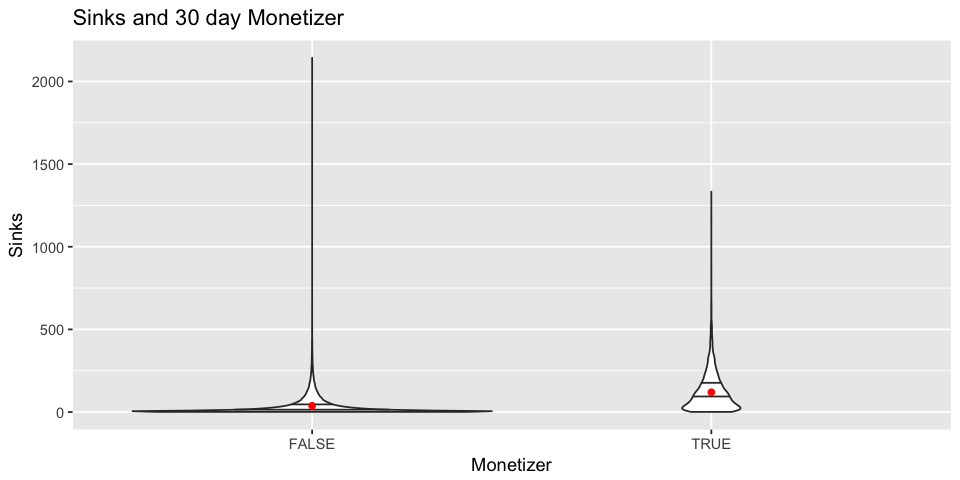

In [56]:
# How does the distribution of power up usage (3 days from install) differ between day 30 payers and non-payers?
ggplot(filter(players.sub, SESHTIME > 0), aes(x = factor(purchaser_30), y = TOTALSINKS)) + 
  geom_violin(trim = TRUE, draw_quantiles = c(0.5, 0.75))  + 
  stat_summary(fun.y = "mean", geom = "point", colour = "red") +
  xlab('Monetizer')  + ylab('Sinks') + 
  ggtitle('Sinks and 30 day Monetizer')

# table form for reference
players.sub %>% filter(SESHTIME > 0) %>% group_by(purchaser_30) %>% 
    summarise(count = n(), mean = mean(TOTALSINKS), median = median(TOTALSINKS), sd = sd(TOTALSINKS))

#### Level attempts by 30 day purchaser

Of the players who registered an attempt, paying players do have more attempts on average than non-payers. The distributions in both groups are positively skewed where the mean is greater than the median. This follows the same pattern as the other three metrics. 

On a seperate note: What is suprising is the number of players, including payers, who don't register a level attempt. This should be clarified with the engineering team. 

purchaser_30,count,mean,median,sd
FALSE,109013,16.73427,7,27.19210
TRUE,2347,43.15935,30,43.59377


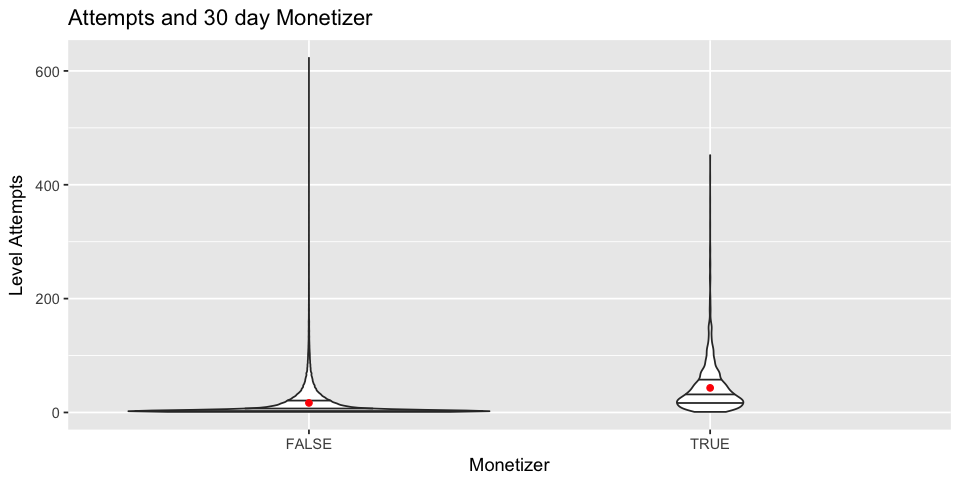

In [65]:
# How does the distribution of level attempts (3 days from install) differ between day 30 payers and non-payers?
ggplot(filter(players.sub, ATTEMPTS >0), aes(x = factor(purchaser_30), y = ATTEMPTS)) + 
  geom_violin(trim = TRUE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  stat_summary(fun.y = "mean", geom = "point", colour = "red") +
  xlab('Monetizer')  + ylab('Level Attempts') +
  ggtitle('Attempts and 30 day Monetizer')

# table form for reference
players.sub %>% filter(ATTEMPTS > 0) %>% group_by(purchaser_30) %>% 
    summarise(count = n(), mean = mean(ATTEMPTS), median = median(ATTEMPTS), sd = sd(ATTEMPTS))

From all of the violin plots above, it is clear (at least visually) that the 30 day payers as a group seem more engaged, sink more in level, and attempt more levels than the typical non-paying player.

### Correlation plot

To get an idea if any of the features are correlated to 30 day purchases and the logical purchaser, or collinear to each other, we need to make a correlation matrix. 

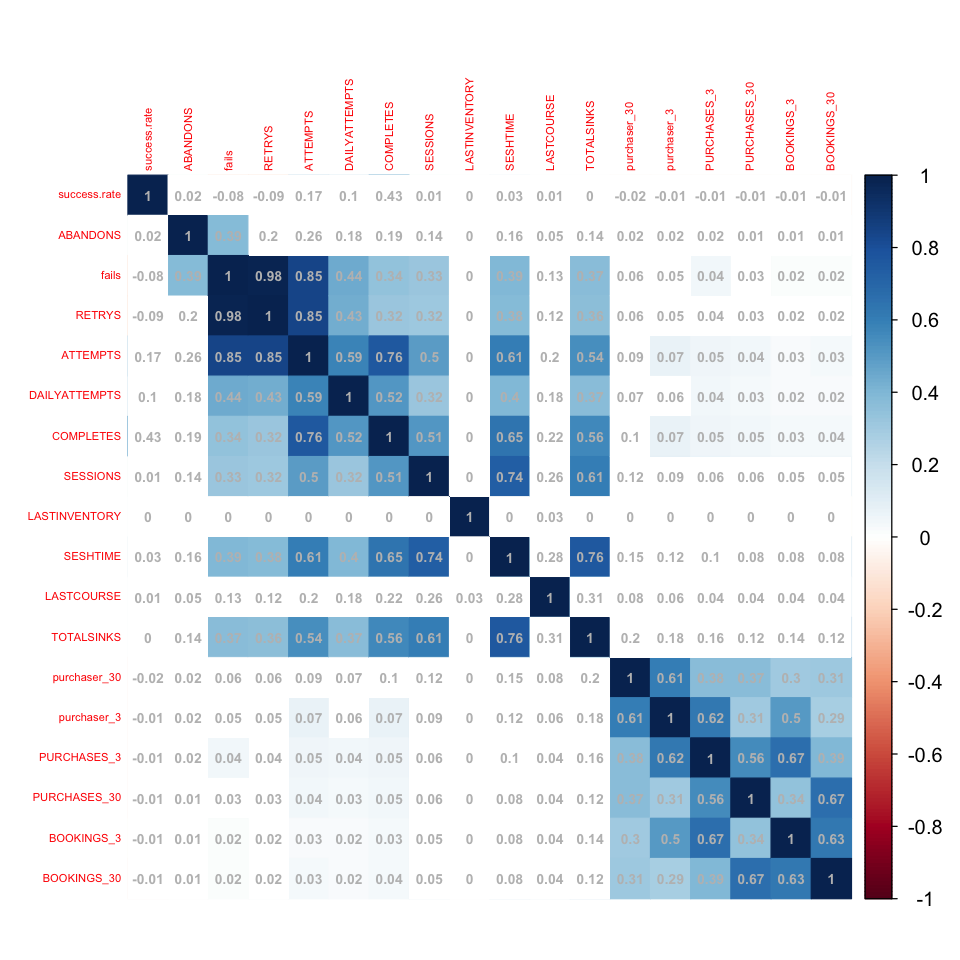

In [79]:
# correlation plot

require(corrplot)

# get correlations between variables/columns
cord <- players.sub
cors <- cor(cord, method = 'pearson')

# get p.values for correllation matrix, return a list. 
# this function comes from help documentation on corrplot
cor.mtest <- function(mat, conf.level = 0.95){
  mat <- as.matrix(mat)
  n <- ncol(mat)
  p.mat <- lowCI.mat <- uppCI.mat <- matrix(NA, n, n)
  diag(p.mat) <- 0
  diag(lowCI.mat) <- diag(uppCI.mat) <- 1
  for(i in 1:(n-1)){
    for(j in (i+1):n){
      tmp <- cor.test(mat[,i], mat[,j], conf.level = conf.level)
      p.mat[i,j] <- p.mat[j,i] <- tmp$p.value
      lowCI.mat[i,j] <- lowCI.mat[j,i] <- tmp$conf.int[1]
      uppCI.mat[i,j] <- uppCI.mat[j,i] <- tmp$conf.int[2]
    }
  }
  return(list(p.mat, lowCI.mat, uppCI.mat))
}

corm <- cor.mtest(cors)

options(repr.plot.width=8, repr.plot.height=8) # reset plot area

# set text parameters and size before making a correlation matrix
cex.before <- par("cex")
par(cex = 0.7)
corrplot(cors,  p.mat = corm[[1]], insig = "blank", method = "color",
         addCoef.col="grey", 
         order = "AOE", tl.cex = 0.8,
         cl.cex = 1/par("cex"), addCoefasPercent = FALSE)
par(cex = cex.before) # reset text to default

The matrix above shows significant strong correlations between purchases and bookings at 3 days and 30 days. This is to be expected because purchases at within the first three days since install are included at 30 days. There are strong correlations between the level results (fails, ATTEMPTS, ABANDONS, etc.). There are also strong correlations between total sinks and level results as well as session time and level results. Total sinks and session time are also strongly correlated.

### Sinks vs. session time

Engagement (session time) and power usage (sinks) are two of the key metrics to measure the health of a game. Are there any visible differences between groups that monetize and those that don't for session time and sinks? Density plots will help plot the large volume of data for the two groups. Here we'll look at non-paying players who have played more than two sessions.

Warning message:
“Removed 3055 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 3055 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 51854 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 51854 rows containing non-finite values (stat_density2d).”

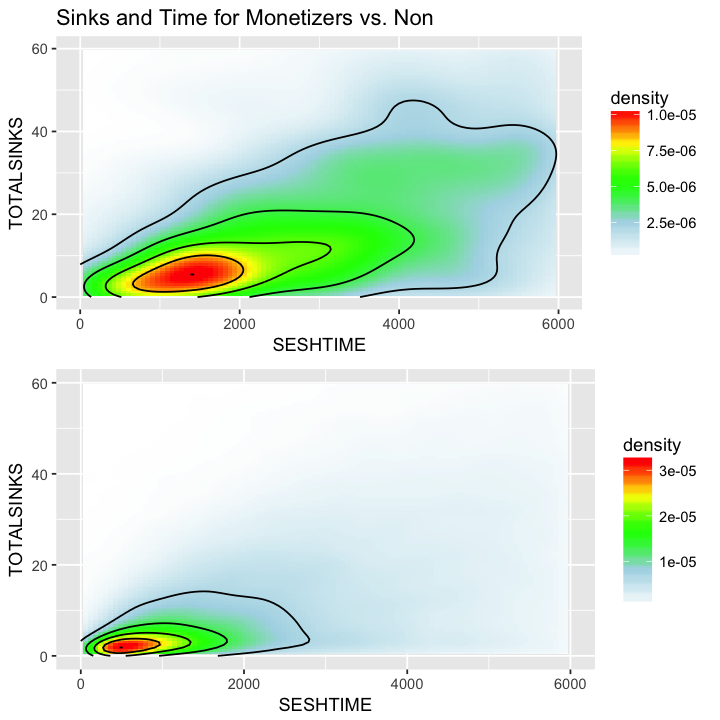

In [80]:
# density plots comparing 30 day purchasers to non-purchasers who have had more than 2 sessions.
# set color pallette
colfunc <- colorRampPalette(c("white", "lightblue", "green", "yellow", "red"))

options(repr.plot.width=6, repr.plot.height=6) # reset plot area

# density plots with 5x zoom
p1 <- ggplot(dplyr::filter(players.sub, purchaser_30 == TRUE), aes(x = SESHTIME, y = TOTALSINKS)) +
  ylim(0, 300/5) + xlim(0,30000/5) +
  stat_density2d(geom="tile", aes(fill = ..density..), contour = FALSE) +
  scale_fill_gradientn(colours=colfunc(400)) + 
  ggtitle("Sinks and Time for Monetizers vs. Non") +
  geom_density2d(colour="black", bins=5)

p2 <- ggplot(dplyr::filter(players.sub, purchaser_30 == FALSE & SESSIONS > 2), aes(x = SESHTIME, y = TOTALSINKS)) +
  ylim(0, 300/5) + xlim(0,30000/5) +
  stat_density2d(geom="tile", aes(fill = ..density..), contour = FALSE) +
  scale_fill_gradientn(colours=colfunc(400)) + 
  geom_density2d(colour="black", bins=5)

grid.arrange(p1, p2, nrow = 2)

From the density plots above we can see that the greatest density of monetizers play more and sink more than the greatest density of non-payers, from comparing the red regions. One thing to call out in this plot is that the density color ranges are different. There is also more dispersion for monetizers. 

## Day 30 Purchase Volume

In the following section, we want to attempt to build a simple linear model that predicts purchase volume for players after 30 days in the game. The process includes: scaling the data, split the dataset into a training & testing set,  then build, test, and compare models.

### Scale data

First, we'll scale the numerical data, and then remove the labeled columns in addtion to the purchaser_3 logical value. 

In [82]:
# scale data - z score normalization
nums <- sapply(players.sub, is.numeric)
players.sub.scale <- players.sub
players.sub.scale[, nums] <- lapply(players.sub[, nums], scale)
players.sub.scale$PURCHASES_30 <- players.sub$PURCHASES_30

In [84]:
# remove columns that will wreck the model.

players.sub.scale.model <- players.sub.scale %>% select(-BOOKINGS_30, -purchaser_3, -purchaser_30)
str(players.sub.scale.model)

'data.frame':	156656 obs. of  15 variables:
 $ PURCHASES_3  : num [1:156656, 1] -0.0603 -0.0603 -0.0603 -0.0603 -0.0603 ...
  ..- attr(*, "scaled:center")= num 0.0254
  ..- attr(*, "scaled:scale")= num 0.421
 $ BOOKINGS_3   : num [1:156656, 1] -0.0487 -0.0487 -0.0487 -0.0487 -0.0487 ...
  ..- attr(*, "scaled:center")= num 0.128
  ..- attr(*, "scaled:scale")= num 2.62
 $ SESHTIME     : num [1:156656, 1] 0.663 -0.66 -0.649 1.723 0.128 ...
  ..- attr(*, "scaled:center")= num 7518
  ..- attr(*, "scaled:scale")= num 11054
 $ SESSIONS     : num [1:156656, 1] 1.4917 -0.6574 -0.5678 1.4917 -0.0306 ...
  ..- attr(*, "scaled:center")= num 8.34
  ..- attr(*, "scaled:scale")= num 11.2
 $ TOTALSINKS   : num [1:156656, 1] 0.86 -0.596 -0.534 1.743 0.411 ...
  ..- attr(*, "scaled:center")= num 39.5
  ..- attr(*, "scaled:scale")= num 64.6
 $ LASTCOURSE   : num [1:156656, 1] 0.2784 -0.336 -0.336 0.5651 0.0736 ...
  ..- attr(*, "scaled:center")= num 9.2
  ..- attr(*, "scaled:scale")= num 24.4
 $ LASTINVE

### Split data into training and test dataset

Split data into a 70% training set and 30% testing set. The size of the split is something that could be tested and evaluated for, but here will use common practice. 

In [85]:
# split data into a training set and testing set
set.seed(369)
row.samp <- sample(1:nrow(players.sub.scale.model), 0.7*nrow(players.sub.scale.model)) # should evaluate sample weight
players.train <- players.sub.scale.model[row.samp,]
players.test <- players.sub.scale.model[-row.samp,]

### Baseline linear regression w/ all features

The baseline is a simple linear regression model that includes all the features in the training and test sets. We'll use residual plots on training set and performance measures to gauge its performance. Then we'll compare other models to it.

#### Model Train

In [96]:
# Simple linear regression with all features
players.base.lm <- lm(PURCHASES_30 ~ ., data = players.train)
summary(players.base.lm)
AIC(players.base.lm)
BIC(players.base.lm)


Call:
lm(formula = PURCHASES_30 ~ ., data = players.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.783  -0.082  -0.043  -0.024 225.221 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.179261   0.006824  26.271  < 2e-16 ***
PURCHASES_3    2.021916   0.009971 202.782  < 2e-16 ***
BOOKINGS_3    -0.226667   0.011094 -20.432  < 2e-16 ***
SESHTIME       0.053283   0.013551   3.932 8.43e-05 ***
SESSIONS      -0.005925   0.010308  -0.575  0.56542    
TOTALSINKS     0.027218   0.011212   2.428  0.01520 *  
LASTCOURSE     0.020738   0.007511   2.761  0.00576 ** 
LASTINVENTORY -0.001124   0.006253  -0.180  0.85731    
COMPLETES     -0.050614   0.032328  -1.566  0.11743    
ABANDONS      -0.014436   0.007529  -1.918  0.05517 .  
RETRYS        -0.089394   0.037774  -2.367  0.01796 *  
ATTEMPTS       0.096296   0.055759   1.727  0.08417 .  
DAILYATTEMPTS -0.001427   0.009089  -0.157  0.87523    
fails 

[1] 489997.8

[1] 490141.9

The baseline linear regression shows an adj. R^2 of .3885, with an AIC of 4.89e5. From this model, the significant factors that predict 30 day purchase volume are those in the summary that have a p.value of < 0.5, (*,**,***). 3-day purchases are the most important factor which is makes intuitive sense.

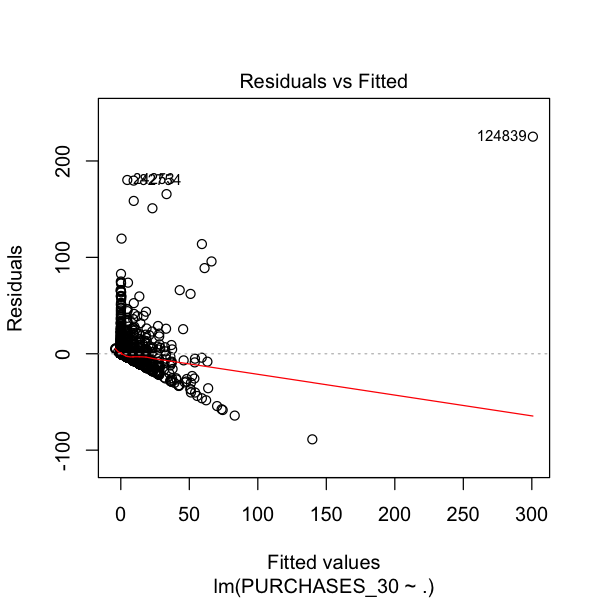

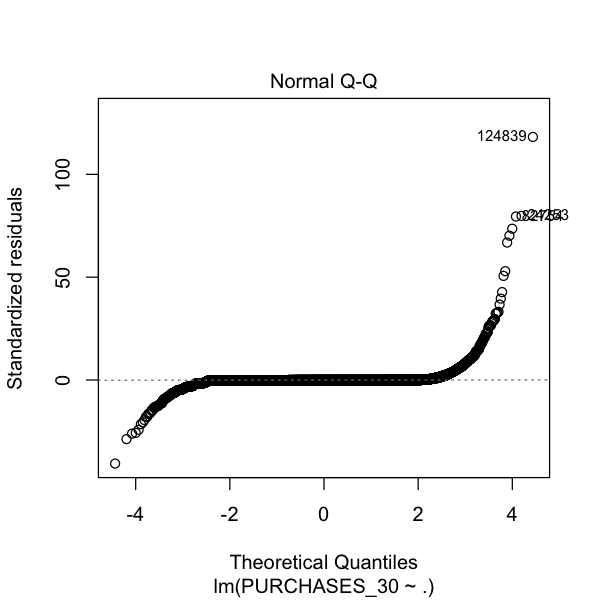

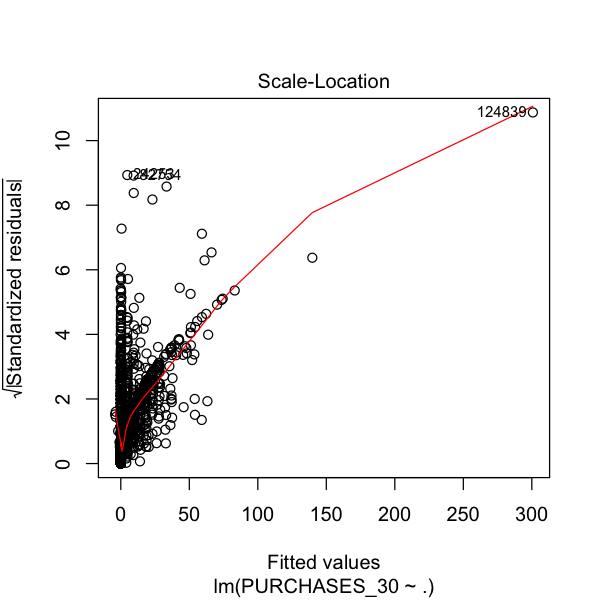

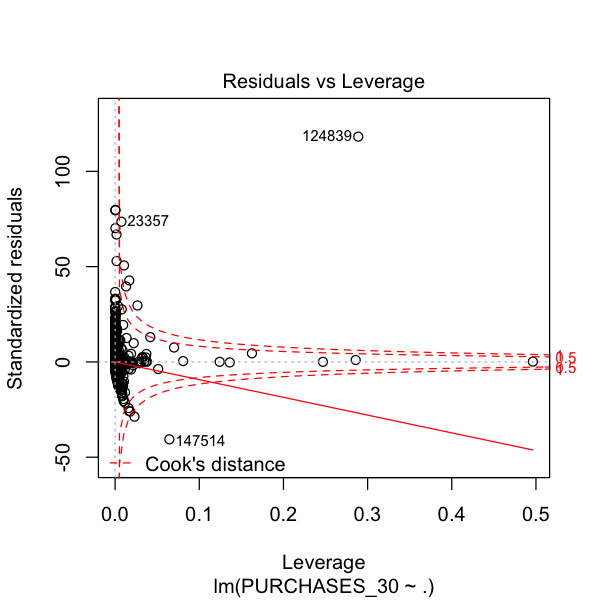

In [88]:
# Plot residual plots
options(repr.plot.width=5, repr.plot.height=5) # reset plot area
plot(players.base.lm)

The residual model performance is not good. The QQ plot is not linear and the standardized residuals versus fitted values show an upward slope, which suggests hetroscadcity. 

#### Model Evaluation

The baseline model when evaluated for normalized mean square error and mean square error we get 0.796 and 10.13, respectively. We can compare other models' evaluation to these metrics. A better regression model reduce these errors.

In [99]:
# helper functions for linear model evaluations

# function to calculate the mse, and nsme for model evaluation
lm.evals <- function(p, a){
  p <- ifelse(p < 0, 0, p)
  mse <- mean((p - a)^2)
  nsme <- mse/mean((mean(a) - a)^2)
  c(mse = mse, nsme = nsme)
}

In [101]:
# Predict with test set
player.base.pred <- predict(players.base.lm, players.test)


Warning message in predict.lm(players.base.lm, players.test):
“prediction from a rank-deficient fit may be misleading”

In [102]:
# Evaluate predictions
actuals_preds.lm <- data.frame(cbind(actuals = players.test$PURCHASES_30, predicteds = player.base.pred))

base.eval <- lm.evals(p = actuals_preds.lm$predicteds, a = actuals_preds.lm$actuals)
base.eval

mse       nsme 
10.1308390  0.7967388

### Stepwise regression

The stepwise regression is a linear regression that systematically removes and adds features that mininmize the AIC of the model.

#### Model Training

In [103]:
# Step AIC 
require(MASS)
players.step.lm <- stepAIC(players.base.lm, direction = "both")

Loading required package: MASS
Warning message:
“package ‘MASS’ was built under R version 3.2.5”
Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



Start:  AIC=178797
PURCHASES_30 ~ PURCHASES_3 + BOOKINGS_3 + SESHTIME + SESSIONS + 
    TOTALSINKS + LASTCOURSE + LASTINVENTORY + COMPLETES + ABANDONS + 
    RETRYS + ATTEMPTS + DAILYATTEMPTS + fails + success.rate


Step:  AIC=178797
PURCHASES_30 ~ PURCHASES_3 + BOOKINGS_3 + SESHTIME + SESSIONS + 
    TOTALSINKS + LASTCOURSE + LASTINVENTORY + COMPLETES + ABANDONS + 
    RETRYS + ATTEMPTS + DAILYATTEMPTS + success.rate

                Df Sum of Sq    RSS    AIC
- DAILYATTEMPTS  1         0 559813 178795
- LASTINVENTORY  1         0 559813 178795
- SESSIONS       1         2 559814 178795
<none>                       559813 178797
- COMPLETES      1        13 559825 178797
- ATTEMPTS       1        15 559828 178798
- ABANDONS       1        19 559831 178799
- RETRYS         1        29 559841 178801
- success.rate   1        30 559842 178801
- TOTALSINKS     1        30 559843 178801
- LASTCOURSE     1        39 559852 178803
- SESHTIME       1        79 559892 178810
- BOOKINGS_3     

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,109645,559812.6,178797.0
- fails,0,0.0000000,109645,559812.6,178797.0
- DAILYATTEMPTS,1,0.1258857,109646,559812.7,178795.0
- LASTINVENTORY,1,0.1643963,109647,559812.9,178793.1
- SESSIONS,1,1.6783980,109648,559814.6,178791.4


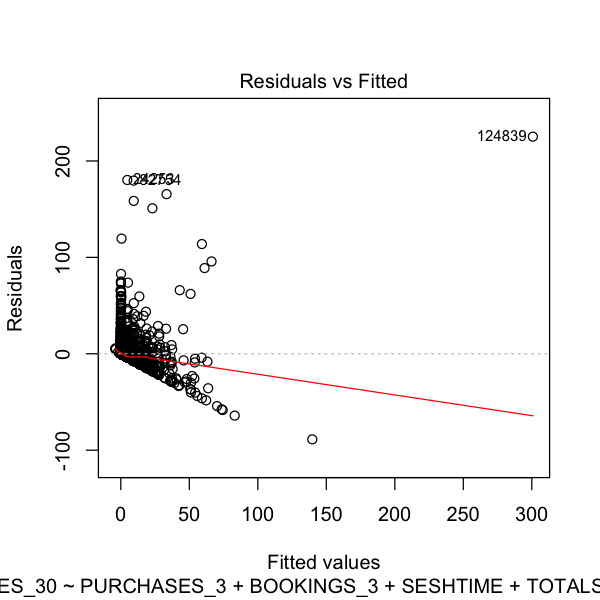

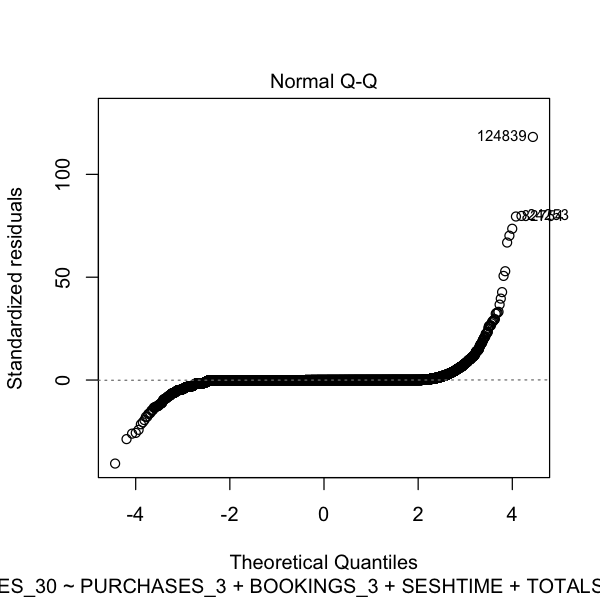

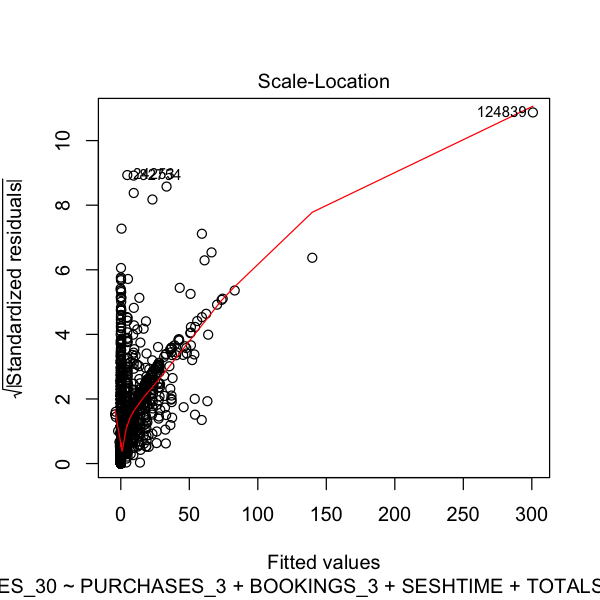

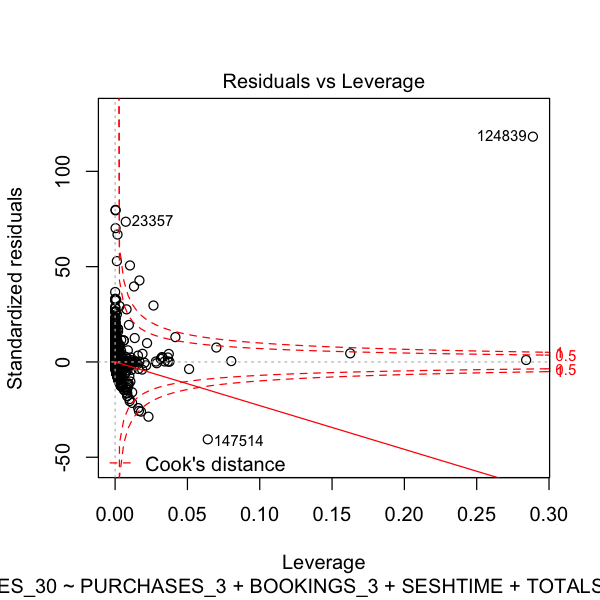

In [105]:
# Show final Stepwise model and plot residuals
players.step.lm$anova
plot(players.step.lm)

The final model includes PURCHASES_3, BOOKINGS_3, SESHTIME, TOTALSINKS,
    LASTCOURSE, COMPLETES , ABANDONS, RETRYS, ATTEMPT, success.rate.


The AIC for this model is significantly redcuced compared to the baseline regression (178791 vs. 4.85e5). Again the residual plots do not behave well and show heteroscedacity.

#### Model evaluation


In [110]:
# Evaluation on test set
player.step.pred <- predict(players.step.lm, players.test)

In [112]:
# Bind actuals and predictied
actuals_preds.st <- data.frame(cbind(actuals = players.test$PURCHASES_30, predicteds = player.step.pred))

In [113]:
# Evaluate on nmse mse
step.eval <- lm.evals(p = actuals_preds.st$predicteds, a = actuals_preds.st$actuals)
step.eval

mse      nsme 
10.130881  0.796742

The mse and nsme show small improvements, which means that this feature reduced model gets the same performance as the baseline with fewer features.

### Regularization with Elastic Net

Again this is another linear regression, but it applies L2 (ridge) and L1(lasso) penalties to coeffcients to reduce overfitting and over-parametization, respectively. The advantage of regularization methods is that you can include many features with having to feature select as in the stepwise regression. Here we only test with alpha =0.5 (50-50 ridge/lasso penalty).

#### Model training


In [114]:
## Ridge/Lasso
require(glmnet)

# set model matrix
mod.players <- model.matrix(PURCHASES_30 ~. -1, data = players.train)
mod.players.test <- model.matrix(PURCHASES_30 ~. -1, data = players.test)
head(mod.players)

Loading required package: glmnet
Warning message:
“package ‘glmnet’ was built under R version 3.2.5”Loading required package: Matrix
Warning message:
“package ‘Matrix’ was built under R version 3.2.5”Loading required package: foreach
Loaded glmnet 2.0-10



,PURCHASES_3,BOOKINGS_3,SESHTIME,SESSIONS,TOTALSINKS,LASTCOURSE,LASTINVENTORY,COMPLETES,ABANDONS,RETRYS,ATTEMPTS,DAILYATTEMPTS,fails,success.rate
35473,-0.06028454,-0.04865853,-0.2833428,-0.2992076,-0.2240342,-0.1312087,-0.006662577,-0.5537243,-0.134066,-0.2269908,-0.4957687,-0.2368244,-0.2403624,-1.1011110
9488,-0.06028454,-0.04865853,0.8574179,1.6707967,0.4573968,0.2784109,-0.006917283,0.9535877,-0.134066,-0.2269908,0.6335846,0.5177576,-0.2403624,0.8921075
127723,-0.06028454,-0.04865853,-0.5578129,-0.3887533,-0.5647497,-0.2950566,-0.006828136,-0.3653103,-0.134066,-0.2269908,-0.3344325,-0.2368244,-0.2403624,0.6429552
121737,-0.06028454,-0.04865853,-0.5733728,-0.6573902,-0.1465988,-0.2950566,-0.006828136,-0.4909197,-0.134066,-0.1659981,-0.3747666,-0.2368244,-0.1829789,-0.5197556
120913,-0.06028454,-0.04865853,2.3899814,0.3276119,0.1011942,0.1145631,-0.004701342,0.8907831,-0.134066,-0.2269908,0.1899101,-0.2368244,-0.2403624,2.0450476
58576,-0.06028454,-0.04865853,-0.5590794,-0.5678446,-0.5028014,-0.2540946,-0.006726254,-0.4281150,-0.134066,-0.2269908,-0.3747666,-0.2368244,-0.2403624,0.4491700


In [123]:
# glmnet - elastic net -ridge lasso
b <- players.train$PURCHASES_30
players.ridge.lasso <- glmnet(mod.players, b, family = 'gaussian', nlambda = 20, alpha = 0.5)

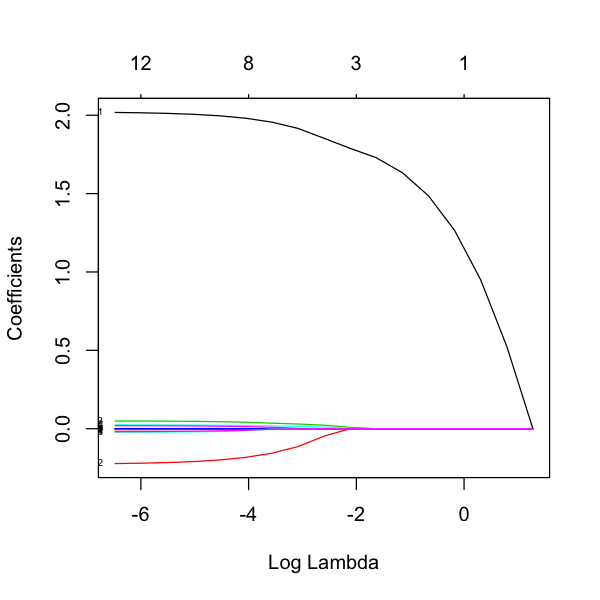

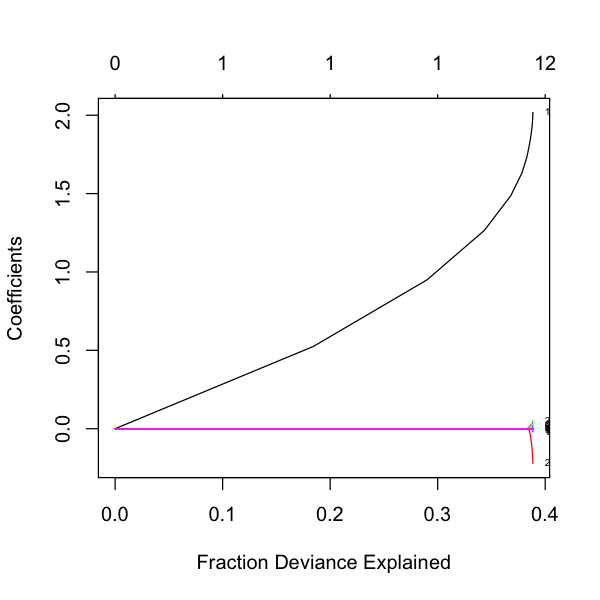

In [116]:
# plot deviance and lambda
plot(players.ridge.lasso, xvar = 'lambda', label = TRUE)
plot(players.ridge.lasso, xvar = 'dev', label = TRUE)

#### Determine lamda with test dataset

From the plots above, we can pick a lambda that balances the coefficients and variance. It can be rather hard from the plots, so we can iteratively test every lambda in the model object to get the one that minimizes nmse and use that for further predictions.

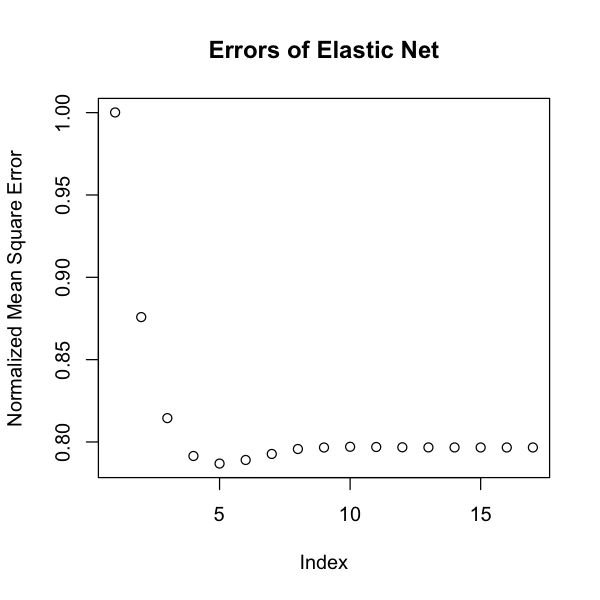

In [117]:
# Determine which lambda reduces NMSE

#provide glm model, actuals, and test model matrix
glm.lin.evals <- function(model, a, mod.m){
  #require(abind)
  r <- data.frame(actual = a)
  e <- data_frame()
  #iterate through all lamdas and get eval metrics
  for (i in 1:length(model$lambda)){
    r$score <- predict(model, newx = mod.m)[,i]
    c <- as.data.frame(t(lm.evals(p = r$score, a = r$actual)))
    e <- rbind(e, c)
  }
  
  return(e)
}

players.eln  <- data.frame(actual = players.test$PURCHASES_30)
ev <- glm.lin.evals(model = players.ridge.lasso, a = players.eln$actual, mod.m = mod.players.test)

plot(ev$nsme, main="Errors of Elastic Net", ylab = "Normalized Mean Square Error")

In [120]:
# get nmse and mse for given labda
ev[5,]

,mse,nsme
5,10.00569,0.7868967


From the plot we see that the 5th index of lambda minimizes NMSE and will be used. The mse and nsme is very slightly less than that of the baseline and stepAIC regressions. They have similar performance, but with no feature pruning.

#### Model evaluation


`geom_smooth()` using method = 'gam'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


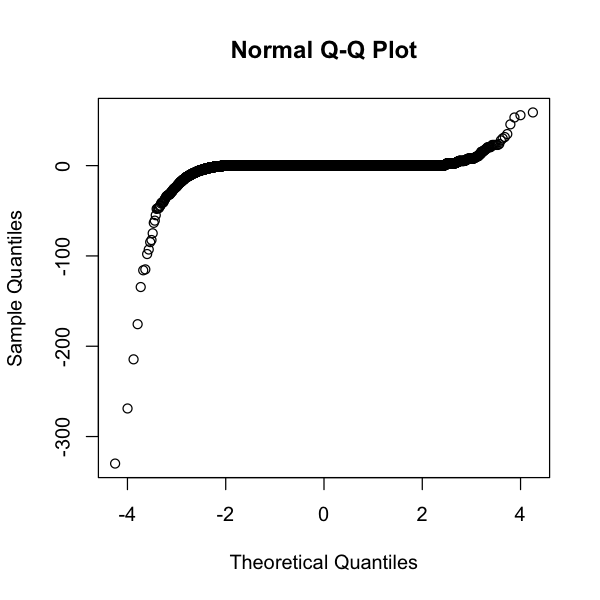

`geom_smooth()` using method = 'gam'


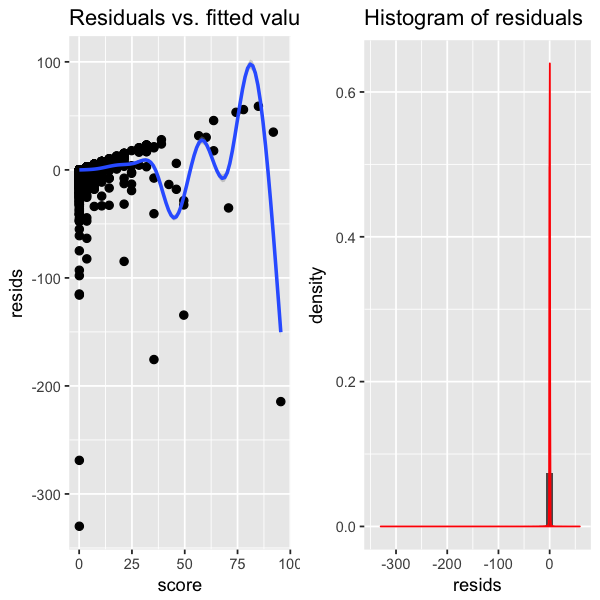

SSE = 127347.281796049 
SSR = 470237.60621808 
SST = 597584.888014129 
RMSE = 2.70980491107669 
Adjusted R^2 = 0.213086505750303 


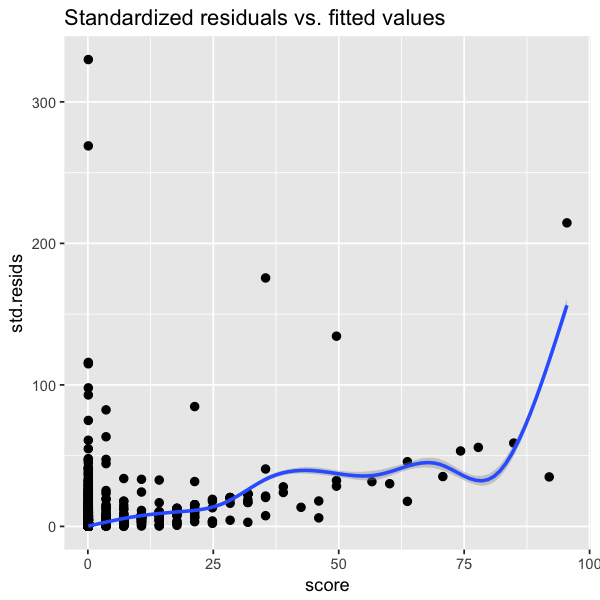

In [118]:
# plot residual plots. From sample regression page by Stephen Elston

plot.svd.reg <- function(df, k = 4){
  require(ggplot2)
  require(gridExtra)
  
  p1 <- ggplot(df) + 
    geom_point(aes(score, resids), size = 2) + 
    stat_smooth(aes(score, resids)) +
    ggtitle('Residuals vs. fitted values')
  
  p2 <- ggplot(df, aes(resids)) +
    geom_histogram(aes(y = ..density..)) +
    geom_density(color = 'red', fill = 'red', alpha = 0.2) +
    ggtitle('Histogram of residuals')
  
  qqnorm(df$resids)
  
  grid.arrange(p1, p2, ncol = 2)
  
  df$std.resids = sqrt((df$resids - mean(df$resids))^2)  
  
  p3 = ggplot(df) + 
    geom_point(aes(score, std.resids), size = 2) + 
    stat_smooth(aes(score, std.resids)) +
    ggtitle('Standardized residuals vs. fitted values')
  print(p3) 
  
  n = nrow(df)
  Ybar = mean(df$actual)
  SST <- sum((df$actual - Ybar)^2)
  SSR <- sum(df$resids * df$resids)
  SSE = SST - SSR
  cat(paste('SSE =', as.character(SSE), '\n'))
  cat(paste('SSR =', as.character(SSR), '\n'))
  cat(paste('SST =', as.character(SSE + SSR), '\n'))
  cat(paste('RMSE =', as.character(SSE/(n - 2)), '\n'))
  
  adjR2  <- 1.0 - (SSR/SST) * ((n - 1)/(n - k - 1))
  cat(paste('Adjusted R^2 =', as.character(adjR2)), '\n')
}

# calculate a score and actuals for the test set with lambda
players.eln$score <- predict(players.ridge.lasso, newx = mod.players.test)[,5]
players.eln$resids <- players.eln$score - players.eln$actual

#plot residuals
plot.svd.reg(players.eln, k = players.ridge.lasso$df[5])

Once again the the residual plots exhibit strange heteroscadistic behavior. It is likely because there are fewer and fewer players making incrementally more purchases, as shown in the standardized residuals vs. score plot. 

### Comparison

All models are showing similar performace, with a slight edge to the elastic net model. The models do have terrible residual performance. It is entirely possible that the payer-to-non imbalance is proving challenging to reasonable lower the error statistics. As next steps, we may need to amplify the minority class (something we'll do in the next section) or utilize more sophisticated models or approaches. We could be asking a too specific question as well. This section asked how many in-app purchasses a player will make in the first 30 days after the first 3 days of gameplay. In the next section, we'll ask a broader question with the aid of classification methods: Will a player purchase in the next 30 days based on their first three days of game-play? 

## Player purchaser by Day 30

In this section, we'll reformulate our question to ask more broadly, which players will purchase in 30 days from install? We'll use logistic regression with ridge and lasso regularization in addition to resampling methods and imbalance correction.

### Logistic ridge/lasso regression

The logistic regression here is a classifier with L2 and L1 penalties similar to the linear regression approach. 

#### Model training

In [124]:
# glmnet - logit
b <- ifelse(players.train$PURCHASES_30 > 0, 1, 0)
players.logit <- glmnet(mod.players, b, family = 'binomial', nlambda = 20, alpha = 0.5)

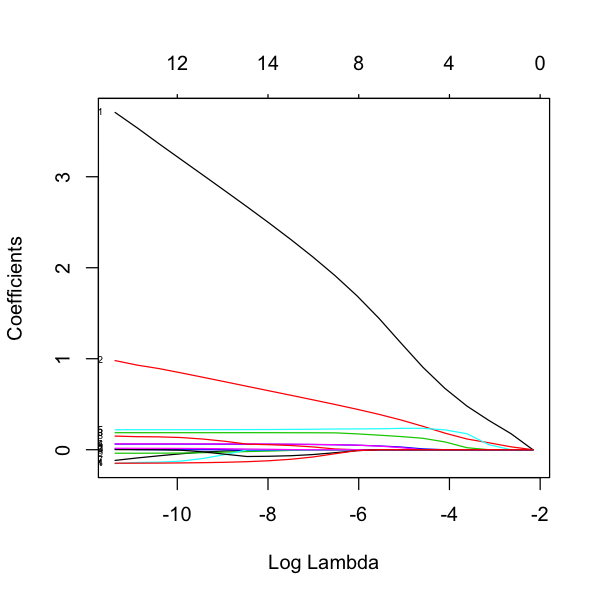

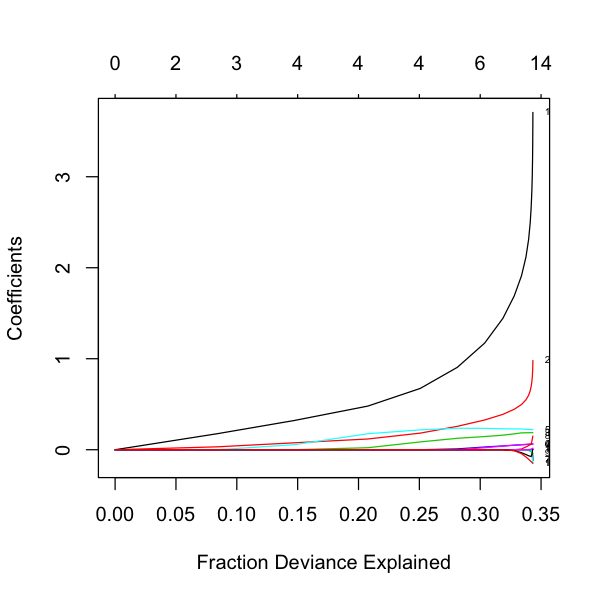

In [125]:
# plot lamda and deviance
plot(players.logit, xvar = 'lambda', label = TRUE)
plot(players.logit, xvar = 'dev', label = TRUE)

While the deviance and lambda plots are useful, we would like to evaluate which lambda to use based on another metric. Particualarly recall - the proportion of actual 30 day purchasers we can predict correctly. The function helps to do this.

In [128]:
#evaluate the model for all lambdas

# logistic evals predicts scores for a model given acutual vaules and returns data frame of mse's and nmse's for 
# picking best classification metric. 
glm.logit.eval <- function(model, a, mod.m, thrsh = 0.5) {
  
  r <- data.frame(actual = a)
  e <- data_frame() 
  #iterate through all lamdas and get eval metrics
  for (i in 1:length(model$lambda)){
    r$score <- predict(model, newx = mod.m)[,i]
    r$score <- exp(r$score)/(1 + exp(r$score))
    r$class <- ifelse(r$score > thrsh, 1, 0)
    c <- as.data.frame(t(logistic.eval(r)))
    e <- rbind(e, c)
  }
  
  return(e)
}

logistic.eval <- function(df){ 
  # First step is to find the TP, FP, TN, FN cases
  df$conf <- ifelse(df$actual == 1 & df$class == 1, 'TP',
                    ifelse(df$actual == 0 & df$class == 1, 'FP',
                           ifelse(df$actual == 0 & df$class == 0, 'TN', 'FN')))
  
  # Elements of the confusion matrix
  TP <- length(df[df$conf == 'TP', 'conf'])
  FP <- length(df[df$conf == 'FP', 'conf'])
  TN <- length(df[df$conf == 'TN', 'conf'])
  FN <- length(df[df$conf == 'FN', 'conf'])
  
  # Compute metrics

  accuracy <- (TP + TN)/(TP + TN + FP + FN)     
  precision <- TP/(TP + FP)
  recall <- TP/(TP + FN)

  c(TP = TP, FP = FP, TN = TN, FN = FN, accuracy = accuracy, precision = precision, recall = recall)
}


players.eln.logit  <- data.frame(actual = ifelse(players.test$PURCHASES_30 > 0, 1, 0))
ev.l <- glm.logit.eval(model = players.logit, a = players.eln.logit$actual, mod.m = mod.players.test)

In [140]:
# print summary stats
ev.l


TP,FP,TN,FN,accuracy,precision,recall
0,0,45769,1228,0.9738707,NaN,0.00000000
40,0,45769,1188,0.9747218,1.0000000,0.03257329
89,0,45769,1139,0.9757644,1.0000000,0.07247557
162,0,45769,1066,0.9773177,1.0000000,0.13192182
229,0,45769,999,0.9787433,1.0000000,0.18648208
272,2,45767,956,0.9796157,0.9927007,0.22149837
313,5,45764,915,0.9804243,0.9842767,0.25488599
384,6,45763,844,0.9819137,0.9846154,0.31270358
455,6,45763,773,0.9834245,0.9869848,0.37052117
463,7,45762,765,0.9835734,0.9851064,0.37703583


From the table of twenty possible lambda values the 10th index maximizes recall at .3703 and precision at 0.983. We'll continue with this index for model evaluation.

#### Model evaluation

In this section we want to evaluate the model performance on test data through a confusion matrix.

In [131]:
# calculate scores with chosen lambda
players.eln.logit$score <- predict(players.logit, newx = mod.players.test)[,10]
players.eln.logit$score <- players.eln.logit$score <- exp(players.eln.logit$score)/(1 + exp(players.eln.logit$score))
players.eln.logit$class <- ifelse(players.eln.logit$score > 0.5, 1, 0)

In [134]:
# Plot a ROC curve and build confusion matrix
require(pROC)
require(caret)

# build a confusion matrix with summary statistics
confusionMatrix(players.eln.logit$class, players.eln.logit$actual)

Loading required package: pROC
Warning message:
“package ‘pROC’ was built under R version 3.2.5”Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following object is masked from ‘package:glmnet’:

    auc

The following objects are masked from ‘package:stats’:

    cov, smooth, var



Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 45762   765
         1     7   463
                                          
               Accuracy : 0.9836          
                 95% CI : (0.9824, 0.9847)
    No Information Rate : 0.9739          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5387          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9998          
            Specificity : 0.3770          
         Pos Pred Value : 0.9836          
         Neg Pred Value : 0.9851          
             Prevalence : 0.9739          
         Detection Rate : 0.9737          
   Detection Prevalence : 0.9900          
      Balanced Accuracy : 0.6884          
                                          
       'Positive' Class : 0               
                                          

The confusion matrix seems reasonable with a recall of 0.377 and precision of .984. Even though this may seem okay it would be interesting to understand how many of the 463 positive predictions were payers in the first 3 days. Can this model predict beyond the obvious?

In [138]:
# non-payer capture
payer.pred <- data.frame(actual = players.eln.logit$actual)
payer.pred$class.3 <-  ifelse(players.test$PURCHASES_3 > 0, 1, 0)
payer.pred$class.30 <- players.eln.logit$class

table(payer.pred)

, , class.30 = 0

      class.3
actual     0     1
     0 45762     0
     1   765     0

, , class.30 = 1

      class.3
actual     0     1
     0     7     0
     1     1   462


This table shows that of the players predicting to purchase 462 of 463 were already purchasers in the first three days. A couple of issues, the majority class seems to be overpowering the minority class (purchasers), and the prediction is overempasizing prior purchasing and not game play habits. A resampling method may solve this, but not likely.

### Cross-validation and logistic regression

Here we'll use cross-validation to see if a resampling method improves model performance.

#### Model training

The cv.glmnet function can run a regularlized binomial classifier with k-fold cross validation. It will first iterate to find the optimal lambda then work with the folds to build the model.


In [141]:
# Cross validation k-folds cv
players.logit.cv <- cv.glmnet(mod.players, b, nfolds = 5, family = 'binomial', nlambda = 20, alpha = 0.5)

15 x 1 sparse Matrix of class "dgCMatrix"
                          1
(Intercept)   -4.099041e+00
PURCHASES_3    2.117322e+00
BOOKINGS_3     5.480755e-01
SESHTIME       1.863898e-01
SESSIONS       5.705079e-02
TOTALSINKS     2.251256e-01
LASTCOURSE     5.876535e-02
LASTINVENTORY  .           
COMPLETES      3.076345e-02
ABANDONS      -1.302103e-06
RETRYS         .           
ATTEMPTS       .           
DAILYATTEMPTS  .           
fails         -5.305994e-02
success.rate  -7.989324e-02

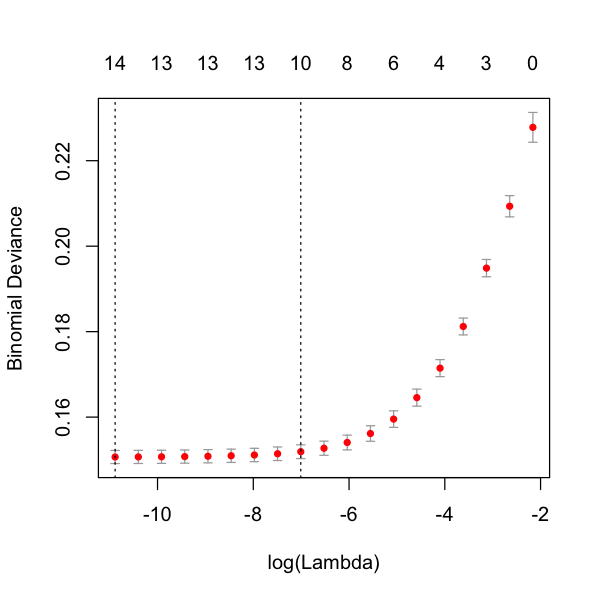

In [142]:
#print coefficients and plot cv.glmnet object.
plot(players.logit.cv)
coef(players.logit.cv)

The coefficient table above shows that the most important factor in predicting purchasing at 30 days post intstall is the # of purchases made in the previous three days.

#### Model evaluation

In [143]:
# calculate scores and class, predict uses best model from cv.glmnet object

players.eln.logit.cv  <- data.frame(actual = ifelse(players.test$PURCHASES_30 > 0, 1, 0))
players.eln.logit.cv$score <- predict(players.logit.cv, newx = mod.players.test)
players.eln.logit.cv$score <- players.eln.logit.cv$score <- exp(players.eln.logit.cv$score)/(1 + exp(players.eln.logit.cv$score))
players.eln.logit.cv$class <- ifelse(players.eln.logit.cv$score > 0.5, 1, 0)

In [144]:
# confusion matrix
confusionMatrix(players.eln.logit.cv$class, players.eln.logit.cv$actual)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 45761   765
         1     8   463
                                          
               Accuracy : 0.9836          
                 95% CI : (0.9824, 0.9847)
    No Information Rate : 0.9739          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5383          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9998          
            Specificity : 0.3770          
         Pos Pred Value : 0.9836          
         Neg Pred Value : 0.9830          
             Prevalence : 0.9739          
         Detection Rate : 0.9737          
   Detection Prevalence : 0.9900          
      Balanced Accuracy : 0.6884          
                                          
       'Positive' Class : 0               
                                          

In [145]:
# non-payer capture
payer.pred <- data.frame(actual = players.eln.logit.cv$actual)
payer.pred$class.3 <-  ifelse(players.test$PURCHASES_3 > 0, 1, 0)
payer.pred$class.30 <- players.eln.logit.cv$class

table(payer.pred)

, , class.30 = 0

      class.3
actual     0     1
     0 45761     0
     1   765     0

, , class.30 = 1

      class.3
actual     0     1
     0     8     0
     1     1   462


This model performs similarly to the previous model and it only correctly identifies 462 payers in the first 3 days. Sampling to correct the imbalance in the classes may improve the model performance. 

### SMOTE'd CV logistic regression

SMOTE is a sampling method that artificially generates samples from the minority class and over samples it and at the same time under samples the majority. The aritificial samples are created by aggregating from the k nearest neighbors. It can help improve model performance when you are trying to predict a class that is highly imbalanced. 

#### Model training

Because SMOTEing is resource intensive we will only randomly sample 25% of the original training data.

In [146]:
# SMOTE'd with glmnet, logit
require(DMwR)

SMOTE.train <- players.train 
SMOTE.train$purchaser_30 <- factor(ifelse(SMOTE.train$PURCHASES_30 > 0, "yes", "no"))
SMOTE.train <- SMOTE.train %>% dplyr::select(-PURCHASES_30)
SMOTE.train <- SMOTE(purchaser_30 ~., sample_frac(SMOTE.train,0.25), k = 3, perc.over = 400, perc.under = 100) # over sample by 400 percent



Loading required package: DMwR
Loading required package: grid


In [147]:
# Create new model matrices for both training and testing sets

SMOTE.mod.train <- model.matrix(purchaser_30 ~. -1, data = SMOTE.train)

SMOTE.test <- players.test
SMOTE.test$purchaser_30 <- factor(ifelse(SMOTE.test$PURCHASES_30 > 0, "yes", "no"))
SMOTE.test <- SMOTE.test %>% dplyr::select(-PURCHASES_30)
SMOTE.mod.test <- model.matrix(purchaser_30 ~. -1, data = SMOTE.test)

In [148]:
# Develop model with k=5 folds and alpha=0.5

SMOTE.logit.cv <- cv.glmnet(SMOTE.mod.train, SMOTE.train$purchaser_30, nfolds = 5, family = 'binomial', nlambda = 20, alpha = 0.5)

15 x 1 sparse Matrix of class "dgCMatrix"
                         1
(Intercept)   -0.376209032
PURCHASES_3    1.620346777
BOOKINGS_3     0.413794198
SESHTIME       0.124194961
SESSIONS      -0.026828021
TOTALSINKS     0.589260469
LASTCOURSE     0.131896841
LASTINVENTORY  5.282104792
COMPLETES      0.075516164
ABANDONS       0.031784134
RETRYS        -0.213577444
ATTEMPTS       0.029729647
DAILYATTEMPTS -0.036736407
fails         -0.009527982
success.rate  -0.150823576

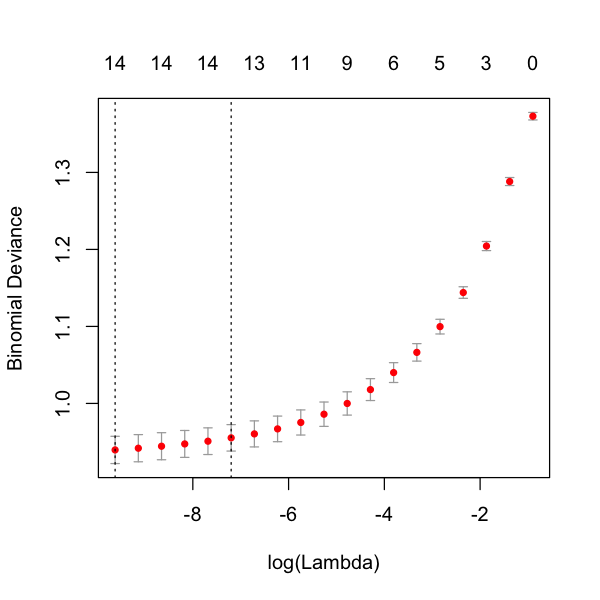

In [149]:
# Plot coeffcients and lambda
plot(SMOTE.logit.cv)
coef(SMOTE.logit.cv)

#### Model Evaluation

In [150]:
# predict scores and clases
SMOTE.r  <- data.frame(actual = factor(ifelse(players.test$PURCHASES_30 > 0, "yes", "no")))
SMOTE.r$score <- predict(SMOTE.logit.cv, newx = SMOTE.mod.test)
SMOTE.r$score <- SMOTE.r$score <- exp(SMOTE.r$score)/(1 + exp(SMOTE.r$score))
SMOTE.r$class <- factor(ifelse(SMOTE.r$score > 0.5, "yes", "no"))

# create a confusion matrix
confusionMatrix(SMOTE.r$class, SMOTE.r$actual)

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  39648   437
       yes  6121   791
                                          
               Accuracy : 0.8605          
                 95% CI : (0.8573, 0.8636)
    No Information Rate : 0.9739          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1569          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8663          
            Specificity : 0.6441          
         Pos Pred Value : 0.9891          
         Neg Pred Value : 0.1144          
             Prevalence : 0.9739          
         Detection Rate : 0.8436          
   Detection Prevalence : 0.8529          
      Balanced Accuracy : 0.7552          
                                          
       'Positive' Class : no              
                                          

Using the SMOTE method we are getting worse accuracy and precisison than previous models. The recall has improved to the point where we are able to use other factors to differentiate between payers and non-payers at day 30 even if they a have spent in the first three days.

In [152]:
# non-payer capture
payer.pred <- data.frame(actual = SMOTE.r$actual)
payer.pred$class.3 <-  ifelse(players.test$PURCHASES_3 > 0, "yes", "no")
payer.pred$class.30 <- SMOTE.r$class

table(payer.pred)

, , class.30 = no

      class.3
actual    no   yes
   no  39648     0
   yes   437     0

, , class.30 = yes

      class.3
actual    no   yes
   no   6121     0
   yes   329   462


### Comparison